# SAiDL Assignment :

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
def sigmoid (z) :
    return 1/(1 + np.exp(-z))

In [3]:
# Initializing Parameters : Weights are inititalized randomly and biases are initialized to zero !
# n_x : No. of neurons in input layer 
# n_y : No. of neurons in output layer 
# n_h : no. of neurons in hidden layer . (Only 1 hidden layer)

def initialize_parameters(n_x,n_h,n_y) :
    W1= np.random.randn(n_h,n_x) 
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)
    b2=np.zeros((n_y,1))

    parameters = {"W1" : W1 , "b1" : b1 ,
                  "W2" : W2 , "b2" : b2}

    return parameters

In [4]:
# Forward Propagation :
# Z1 : Hidden layer activation
# Z2 : Output layer activation
# A1 : Hidden layer output 
# A2 : Predicted output 

def forward_propagation (X,Y,parameters) :
    m=X.shape[1]
    W1=parameters["W1"]
    W2=parameters["W2"]
    b1=parameters["b1"]
    b2=parameters["b2"]

    Z1=np.dot(W1,X) + b1
    A1 =sigmoid(Z1)
    Z2=np.dot(W2,A1) + b2
    A2=sigmoid(Z2)

    cache =(Z1,A1,W1,b1,Z2,A2,W2,b2)    
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),(1-Y))
    cost = -np.sum(logprobs)/m

    return cost ,cache, A2


In [5]:
def backward_propagation(X,Y,cache) :
    m= X.shape[1]
    (Z1,A1,W1,b1,Z2,A2,W2,b2)=cache

    dZ2 = A2 -Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)

    dA1 = np.dot(W2.T,dZ2)
    dZ1 = np.multiply(dA1,A1*(1-A1))
    
    dW1 = np.dot(dZ1,X.T) /m
    db1 = np.sum(dZ1,axis=1,keepdims=True) /m

    gradients= {"dZ2":dZ2 ,"dW2" :dW2,"db2":db2 ,
                "dZ1":dZ1 ,"dW1" :dW1,"db1":db1}
    
    return gradients
    

In [6]:
def update_parameters(parameters,grads,learning_rate) :
    parameters["W1"]=parameters["W1"]-learning_rate*grads["dW1"]
    parameters["W2"]=parameters["W2"]-learning_rate*grads["dW2"]
    parameters["b1"]=parameters["b1"]-learning_rate*grads["db1"]
    parameters["b2"]=parameters["b2"]-learning_rate*grads["db2"]

    return parameters 

In [7]:
X = np.array([[1,1,0,0,1,1,0,0],[1,0,1,0,1,0,1,0],[0,0,0,0,1,1,1,1]])
Y = np.array([[1,0,0,1,0,1,1,0]]) #XOR/XNOR

n_h = 3
n_x =X.shape[0]
n_y =Y.shape[0]

parameters = initialize_parameters(n_x,n_h,n_y)
num_iterations = 100000
learning_rate=0.01
losses = np. zeros((num_iterations,1))

for i in range (num_iterations) :
    losses[i,0],cache,A2 = forward_propagation(X,Y,parameters)
    grads=backward_propagation(X,Y,cache)
    parameters=update_parameters(parameters,grads,learning_rate)

[[0.97311946 0.02389816 0.02465794 0.99587762 0.00383864 0.97517356
  0.97594271 0.02618651]]
[[1. 0. 0. 1. 0. 1. 1. 0.]]


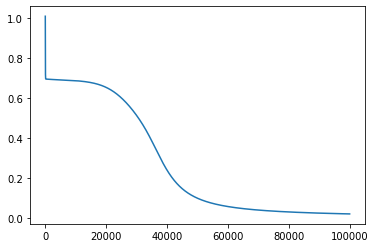

In [14]:
cost,cache,A2=forward_propagation(X,Y,parameters)
pred =(A2>0.5)*1.0
print(A2)
print(pred)
plt.figure()
plt.plot(losses)